## Created By: Rupal D'Souza

## Prediction using Supervised Machine Learning

## Objective
### 1. Predict the percentage of a student based on the no. of study hours. 
### 2. Find the predicted score if a student studies for 9.25 hrs/ day?

## Exploratory Data Analysis

In [1]:
# importing required libraries

# for data analysis
import pandas as pd

# for mathematical operations
import numpy as np

# for data visualization
import seaborn as sns

# plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# splitting the data
from sklearn.model_selection import train_test_split

# linear regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset into a dataframe

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
# display the dataframe

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- The dataframe has 2 columns Hours and Scores.

In [4]:
# dimensions
df.shape

(25, 2)

- There are 25 observations with 2 attributes.

In [5]:
# info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- There are no missing values in the data.
- The hours column is of float datatype and scores column is of integer datatype

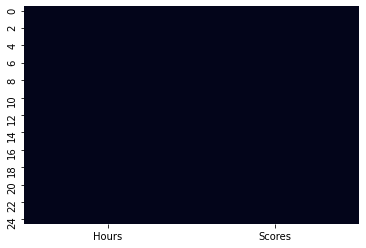

In [6]:
# missingness map

sns.heatmap(df.isnull(),cbar=False)

In [7]:
#checking for number of duplicate rows

df.duplicated().sum()

0

- There are no duplicate rows in the dataframe

In [8]:
# summary statistics

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- There isn't a large difference between the mean and the median values in each column.This implies that the columns follow normal distribution.

<function matplotlib.pyplot.show(*args, **kw)>

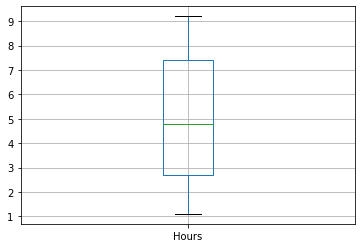

In [9]:
# boxplot to check for outliers

df.boxplot(column=['Hours'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

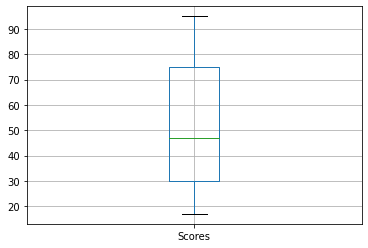

In [10]:
df.boxplot(column=['Scores'])
plt.show

- There are no outliers in the data

### Linearity: The relationship between the independent and dependent variables needs to be linear.

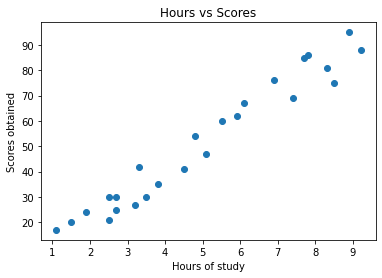

In [11]:
# scatter plot to check the relation of hours with the scores variable

x = df['Hours']
y = df['Scores']
plt.scatter(x, y)
plt.title('Hours vs Scores')
plt.xlabel('Hours of study')
plt.ylabel('Scores obtained')
plt.show()

- We can observe that there is a linear relationship between x and y

## Model Building and Evaluation

In [12]:
# extracting independent and dependent variable

X = df.drop(["Scores"],axis=1)
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [13]:
y = df.Scores
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [14]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.20)

In [15]:
# Fitting Simple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

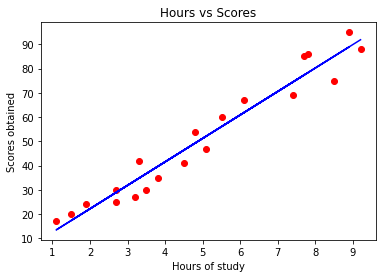

In [16]:
# Visualising the Training set results

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours of study')
plt.ylabel('Scores obtained')
plt.show()

In [17]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

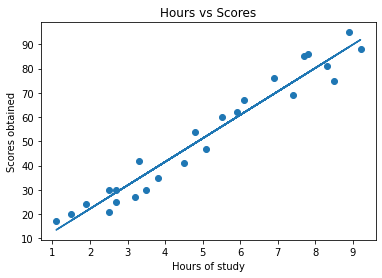

In [18]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Scores')
plt.xlabel('Hours of study')
plt.ylabel('Scores obtained')
plt.show()

In [19]:
# evaluation metric

print("R squared: {}".format(r2_score(y_test,y_pred)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R squared: 0.9678055545167994
Root Mean Squared Error: 4.352380006653288


- As the R2 is closer to 1 we can say that the model fits the data well and proportion of the variance of y is explained well by the independent variable.
- As the RMSE is small, it indicates better fit.

In [20]:
# compare the actual output values with the predicted values

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [21]:
residuals = y_test.values-y_pred
residuals

array([-2.18814104,  2.96791226, -6.03208774,  6.36676838,  2.04884653])

In [24]:
# predicting the scores for 9.25 hours per day

hours = [[9.25]]
new_pred = regressor.predict(hours)
print("Number of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(new_pred[0]))

Number of Hours = 9.25
Predicted Score = 92.38611528261494
